In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


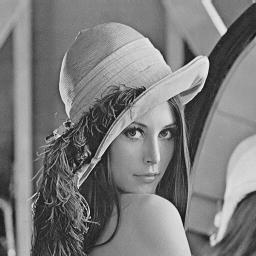

In [3]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/lena256.jpg')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
cv2_imshow(gimg)
#plt.imshow(gimg1, cmap='gray')

In [4]:
gx = np.array([[-1, -2, -1], [0,0,0], [1, 2, 1]], dtype = int)
gy = np.array([[-1, 0, 1],[-2,0,2],[-1, 0, 1]], dtype = int)

In [5]:
x = cv2.filter2D(gimg, -1, gx)
y = cv2.filter2D(gimg, -1, gy)

In [6]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

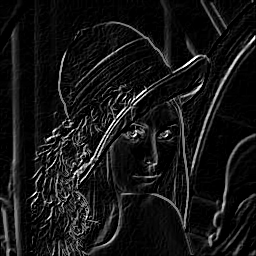

In [7]:
#outimg = outimg * 5
cv2_imshow(outimg)

In [8]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype = np.ubyte)

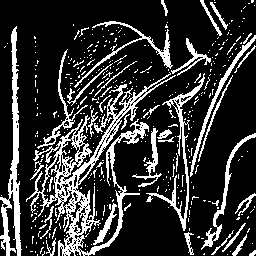

In [9]:
threshold = 30

for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if(outimg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

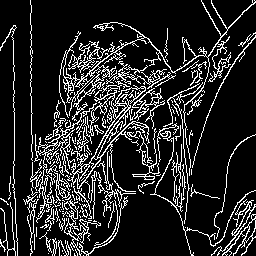

In [10]:
cannyimg = cv2.Canny(gimg, 20, 200)
cv2_imshow(cannyimg)

In [11]:
blurimg = cv2.GaussianBlur(gimg, (5,5), 1.4)

In [12]:
x = cv2.filter2D(blurimg, -1, gx)
y = cv2.filter2D(blurimg, -1, gy)

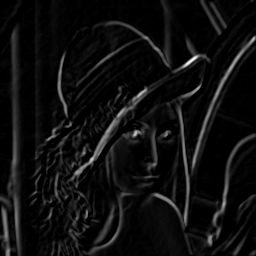

In [13]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(cannyOutimg)

In [14]:
cannyDirection = np.arctan2(y, x)